In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


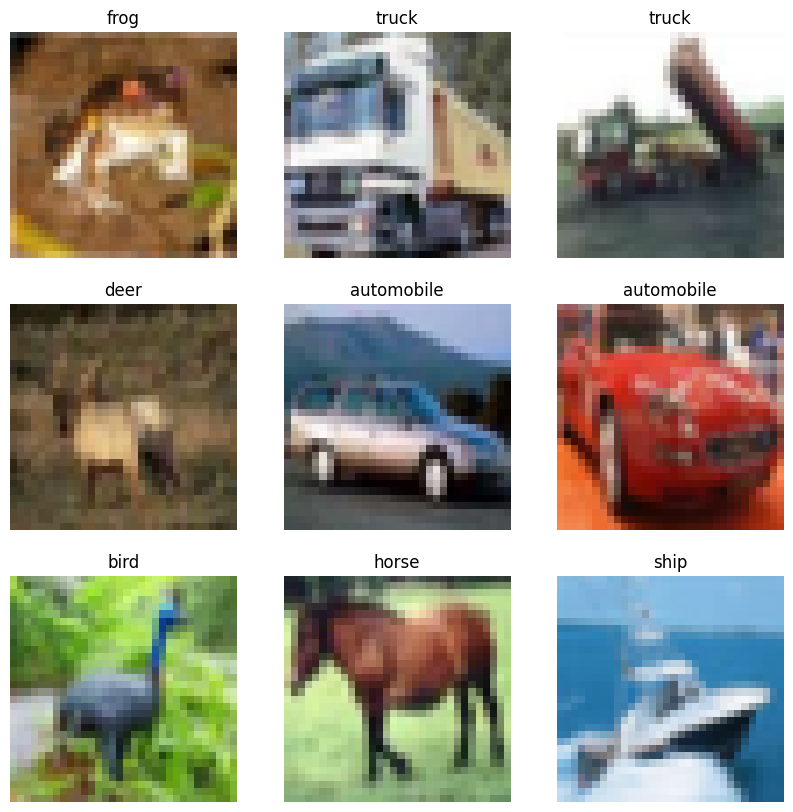

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize a few images
plt.figure(figsize=(10,10))
for i in range(9):  # Visualize the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])  # Display the class name of each image
    plt.axis('off')  # Turn off the axis labels

plt.show()

In [4]:
# Data Preprocessing
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\Malay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.2812 - loss: 1.9231 - val_accuracy: 0.4957 - val_loss: 1.4042
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4974 - loss: 1.3964 - val_accuracy: 0.5804 - val_loss: 1.1746
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5645 - loss: 1.2290 - val_accuracy: 0.6283 - val_loss: 1.0734
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.6077 - loss: 1.1050 - val_accuracy: 0.6432 - val_loss: 1.0159
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6403 - loss: 1.0217 - val_accuracy: 0.6619 - val_loss: 0.9540
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6663 - loss: 0.9551 - val_accuracy: 0.6828 - val_loss: 0.9075
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6925 - loss: 0.8902 - val_accuracy: 0.6995 - val_loss: 0.8613
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.7070 - loss: 0.8414 - 

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7092 - loss: 0.8485
Test accuracy: 0.7034


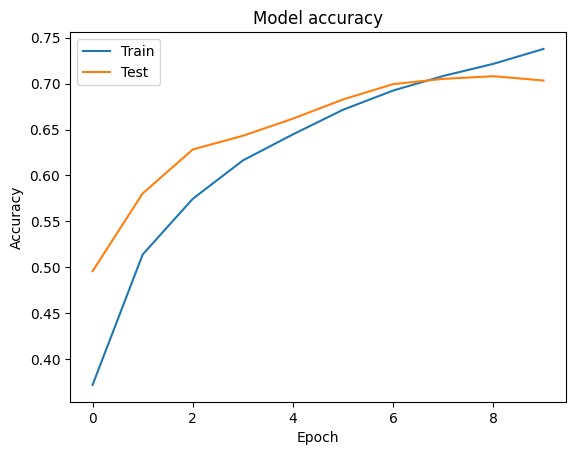

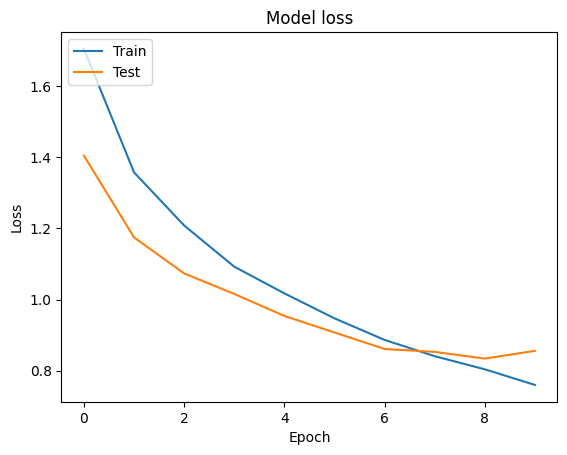

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
